#Importing the libraries

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import missingno
import seaborn as sns
import numpy as np
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [250]:
warnings.filterwarnings('ignore')

#Importing Dataset

In [251]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.shape

(891, 12)

In [252]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Analysis

In [253]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

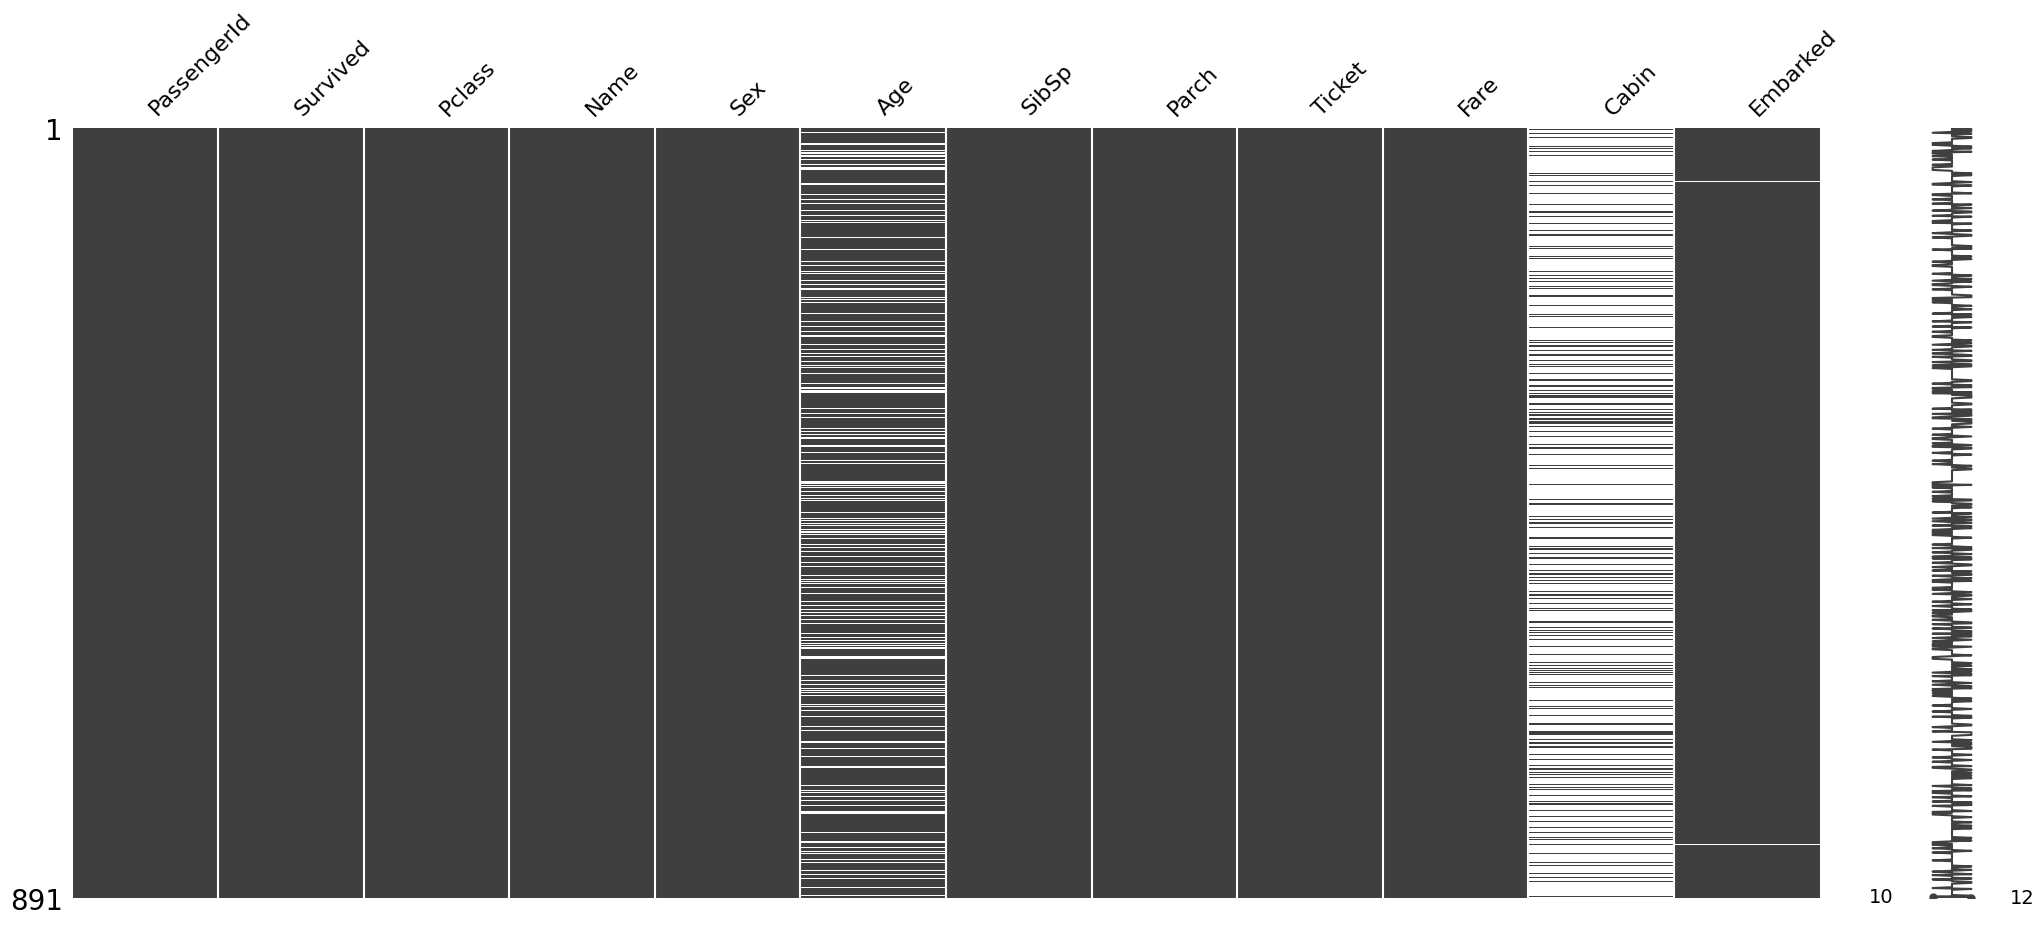

In [254]:
missingno.matrix(df)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [256]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Feature Analysis

In [257]:
df['Pclass'].unique()

array([3, 1, 2])

In [258]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [259]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

#Categorical feature analysis

Here the categorical variables are Sex, Pclass, Embarked

Let's compare Sex with survival rate

In [260]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are more male passengers than female passengers

In [261]:
df[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='count'>

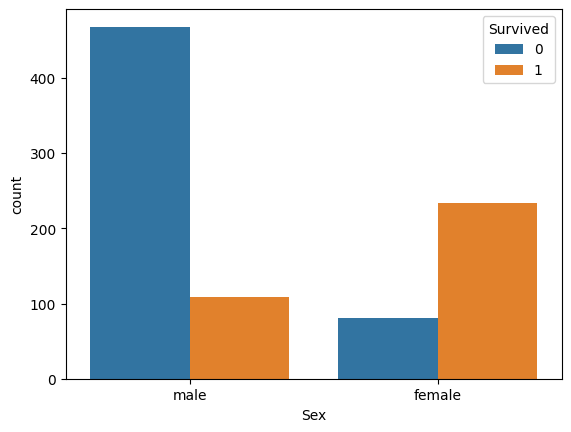

In [262]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

<Axes: xlabel='Sex', ylabel='Survived'>

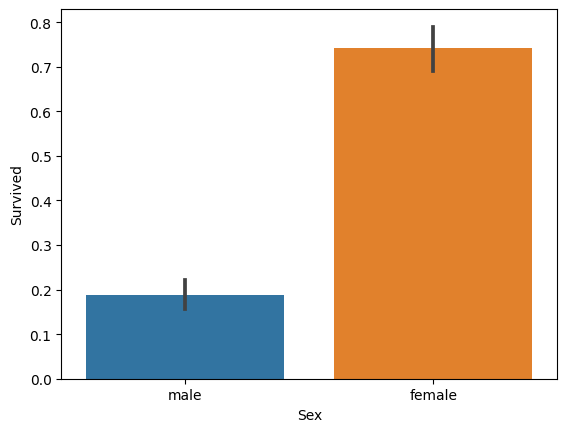

In [263]:
sns.barplot(x=df['Sex'],y=df['Survived'])

From the above plot we can observe that female survival rate more than that of men

Now let's compare passenger class with survival rate

In [264]:
df['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [265]:
df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

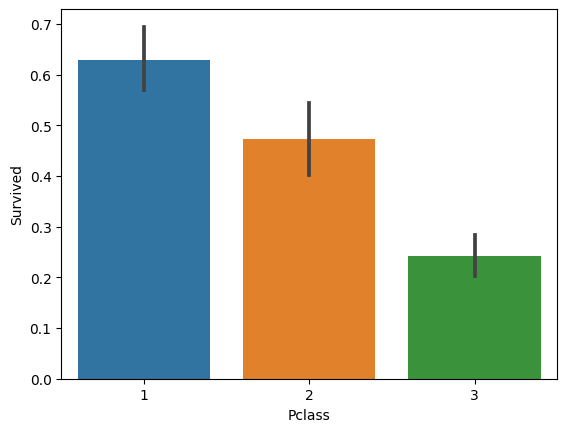

In [266]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

Class1 passengers are most likely to survive

<Axes: xlabel='Pclass', ylabel='Survived'>

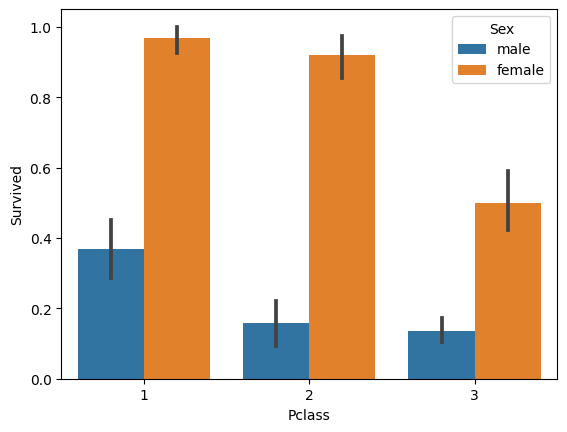

In [267]:
sns.barplot(x=df['Pclass'],y=df['Survived'],hue=df['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

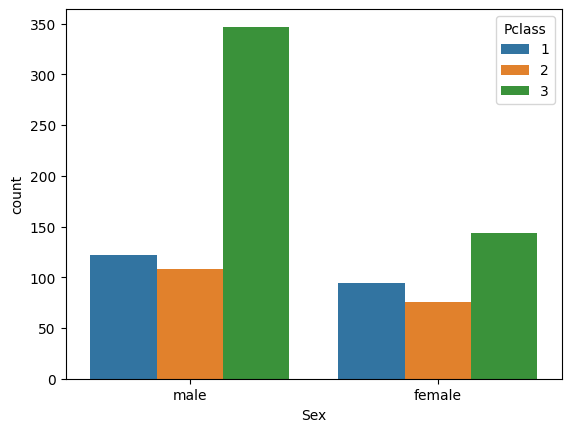

In [268]:
sns.countplot(x=df['Sex'],hue=df['Pclass'])

Male percentage is high in third class that may be one of the reason for low survival rate

Embarked vs Survived

In [269]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [270]:
df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

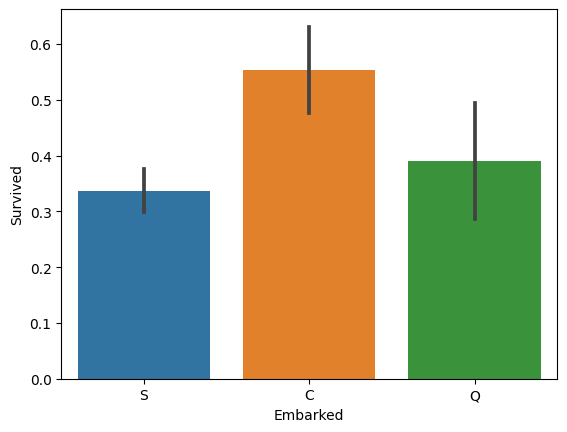

In [271]:
sns.barplot(x=df['Embarked'],y=df['Survived'])

Passengers form city C are most likely to survive

<Axes: xlabel='Pclass', ylabel='count'>

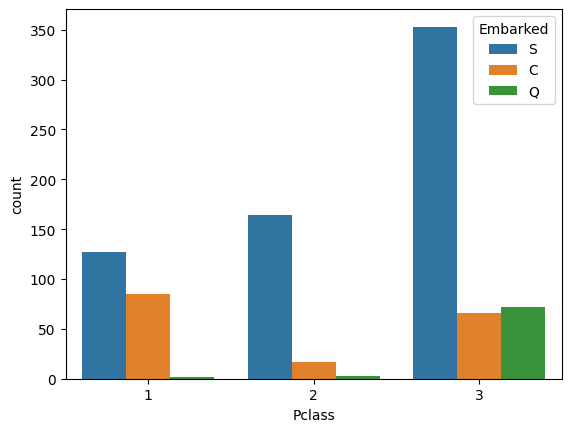

In [272]:
sns.countplot(x=df['Pclass'], hue=df['Embarked'])

From above we can see that most of the passengers from city C are first class whereas most of the passengers from city S are third class

<Axes: xlabel='Sex', ylabel='count'>

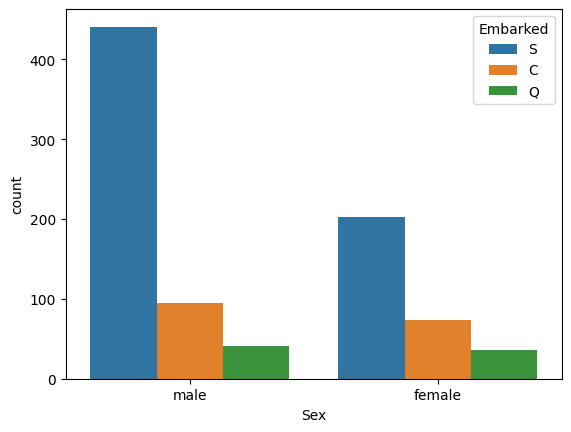

In [273]:
sns.countplot(x=df['Sex'],hue=df['Embarked'])

In city S male passangers are more compared to female that may be one of the reason for low survival rate of that city

In city Q male and female percentage is almost same but most of them are from third class that may be the reason for low survival rate

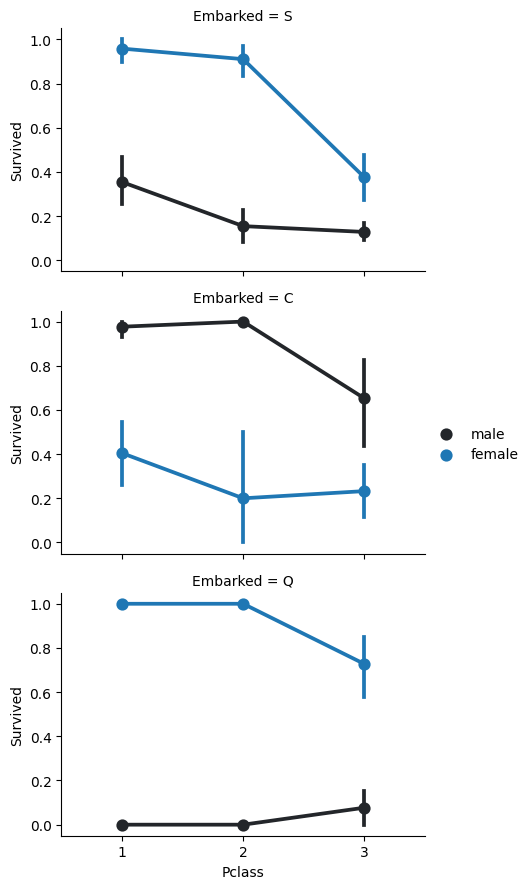

In [274]:
grid = sns.FacetGrid(data=df,row='Embarked',aspect=1.5, palette='bright')
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()

#Numerical Variables

#Removing outliers

In [275]:
def remove_outliers(dataframe, n, data):
  outliers_to_remove = []
  outlier_indices = []
  for col in data:
    q1 = np.percentile(dataframe[col],25)
    q3 = np.percentile(dataframe[col],75)
    iqr = q3-q1
    outlier_step = 1.5*iqr
    outlier_indices = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index
    outliers_to_remove.extend(outlier_indices)
  outlier_indices_dict = Counter(outliers_to_remove)
  outliers_indices_to_rem = [key for key,value in outlier_indices_dict.items() if value > n]
  return outliers_indices_to_rem

outliers = remove_outliers(df,2,['Age','SibSp','Parch','Fare'])
outliers

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [276]:
df.iloc[outliers,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [277]:
print('Number of rows before removing outliers = ',len(df))
df2 = df.drop(outliers, axis=0).reset_index(drop=True)
print('Number of rows after removing outliers = ',len(df2))

Number of rows before removing outliers =  891
Number of rows after removing outliers =  881


#Numerical values correlation with survival rate

<Axes: >

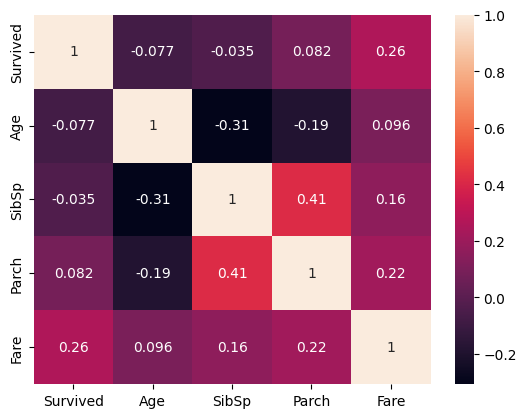

In [278]:
sns.heatmap(df[['Survived','Age','SibSp','Parch','Fare']].corr(),annot=True)

Age correlation with survival rate

In [279]:
df['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [280]:
df[['SibSp','Survived']].groupby(by='SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

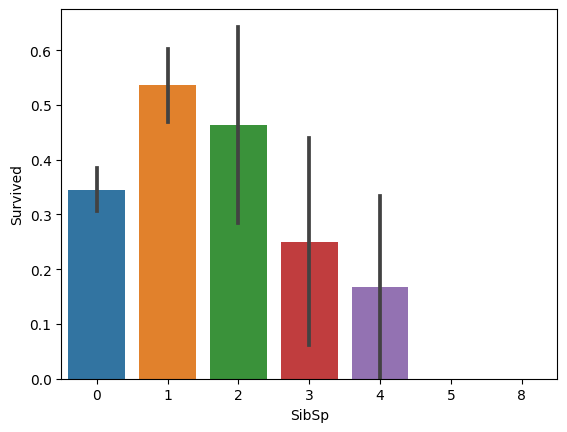

In [281]:
sns.barplot(x=df['SibSp'],y=df['Survived'])

Parch vs Survival rate

In [282]:
df['Parch'].value_counts(dropna=True)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [283]:
df[['Parch','Survived']].groupby(by='Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

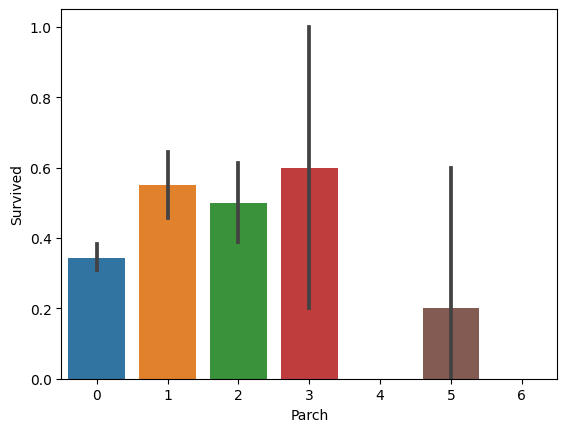

In [284]:
sns.barplot(x=df['Parch'],y=df['Survived'])

Age vs Survival rate

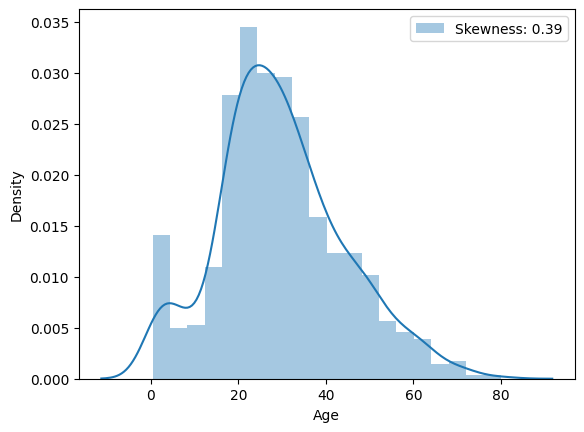

In [285]:
sns.distplot(df['Age'],label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend()

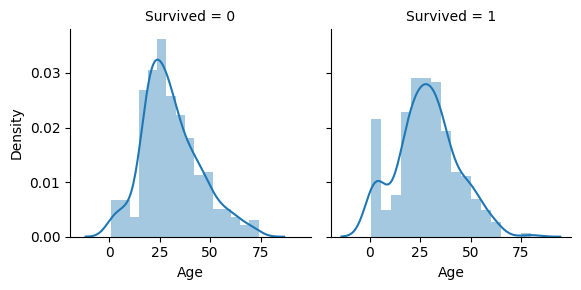

In [286]:
grid = sns.FacetGrid(df, col='Survived')
grid.map(sns.distplot, 'Age')

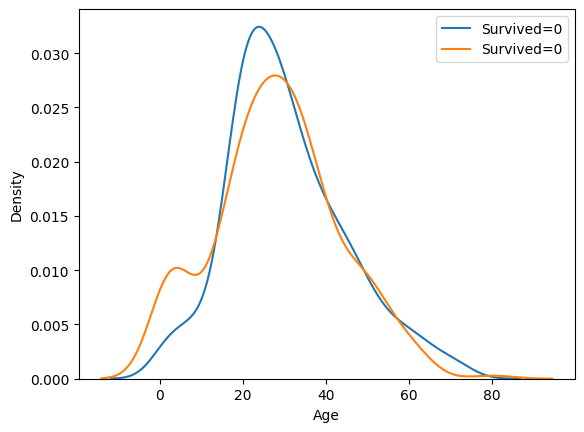

In [287]:
sns.kdeplot(df['Age'][df['Survived']==0],label='Survived=0')
sns.kdeplot(df['Age'][df['Survived']==1],label='Survived=0')
plt.legend()

Fare vs Survival rate

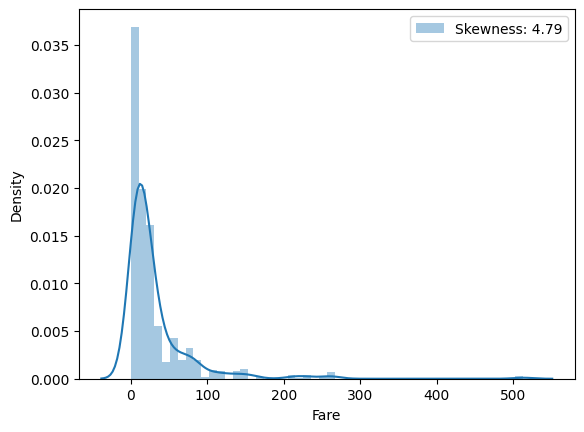

In [288]:
sns.distplot(df['Fare'],label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.legend()

Skewness for fare is very high

#Data Preprocessing

In [289]:
df1 = df.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [290]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [291]:
df1.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [292]:
df1['Sex'] = df1['Sex'].apply(lambda x:0 if x=='male' else 1)

In [293]:
mode = df1['Embarked'].dropna().mode().array[0]
mode

'S'

In [294]:
df1['Embarked'].fillna(mode,inplace=True)

In [295]:
df1.isnull().sum().sort_values(ascending=False)

Age         177
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

<Axes: >

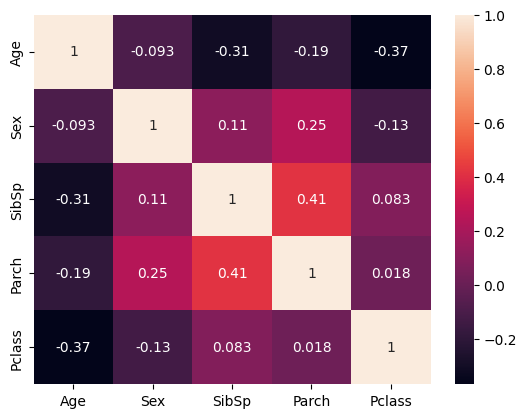

In [296]:
sns.heatmap(df1[['Age','Sex','SibSp','Parch','Pclass']].corr(),annot=True)

correlation of age with sex is almost 0, so let's assume that the passenger with same SibSp, Parch, Pclass have same age

In [297]:
age_nan_indices = list(df1[df1['Age'].isnull()].index)
len(age_nan_indices)

177

In [298]:
for idx in age_nan_indices:
  median_age = df1['Age'].median()
  predicted_age = df1['Age'][(df1['SibSp']==df1.iloc[idx]['SibSp']) & (df1['Parch']==df1.iloc[idx]['Parch']) & (df1['Pclass']==df1.iloc[idx]['Pclass'])].median()

  if np.isnan(predicted_age):
    df1.loc[idx,'Age'] = median_age
  else:
    df1.loc[idx,'Age'] = predicted_age

In [299]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Logarithmic transformation is applied to fare column to reduce skewness

<Axes: xlabel='Fare', ylabel='Density'>

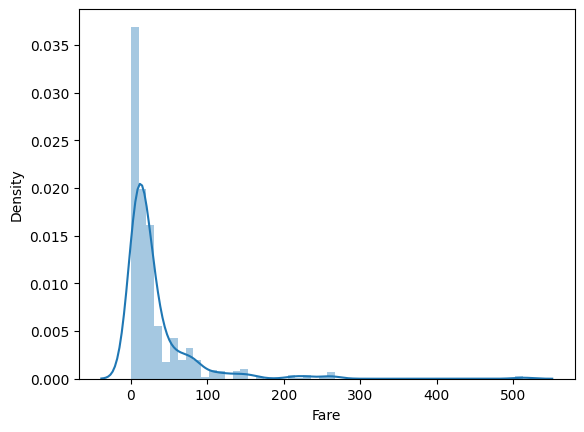

In [300]:
sns.distplot(df1['Fare'])

In [301]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [302]:
df1['Fare'] = df1['Fare'].apply(lambda x: np.log(x) if x>0 else 0)

<Axes: xlabel='Fare', ylabel='Density'>

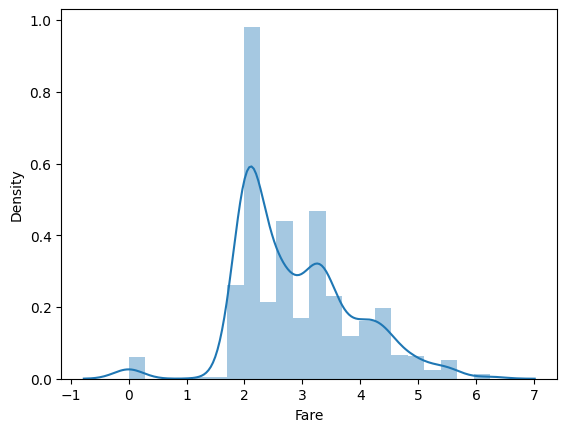

In [303]:
sns.distplot(df1['Fare'])

In [304]:
df1['Fare'].describe()

count    891.000000
mean       2.893846
std        1.002899
min        0.000000
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

#Feature Engineering

Creating new features


*   isAlone
*   Title
*   Age*Class



In [305]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [306]:
df1['Title'] = df1['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])
df1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [307]:
df1['Title'].value_counts().sort_values(ascending=False)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [308]:
df1['Title'].replace(['Dr','Rev','Major','Col','the Countess','Capt','Sir','Lady','Don','Jonkheer'],'Rare',inplace=True)
df1['Title'].replace(['Mlle','Ms'],'Miss',inplace=True)
df1['Title'].replace('Mme','Mrs',inplace=True)

In [309]:
df1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [310]:
df1['Title'].value_counts().sort_values(ascending=False)

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [311]:
df1[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values('Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


<Axes: xlabel='Title', ylabel='Survived'>

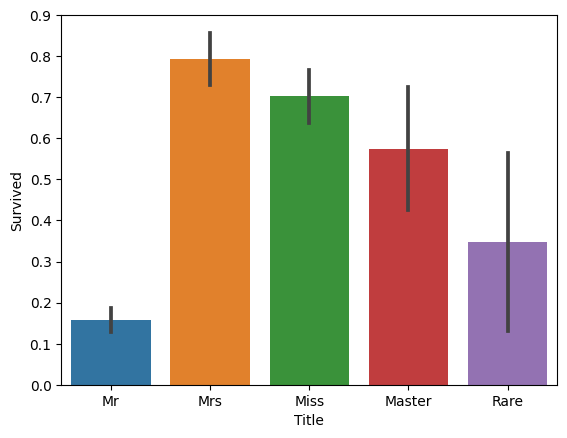

In [312]:
sns.barplot(x=df1['Title'],y=df1['Survived'])

In [313]:
df1.drop(['Name'],axis=1,inplace=True)

In [314]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,1.981001,S,Mr
1,1,1,1,38.0,1,0,4.266662,C,Mrs
2,1,3,1,26.0,0,0,2.070022,S,Miss
3,1,1,1,35.0,1,0,3.972177,S,Mrs
4,0,3,0,35.0,0,0,2.085672,S,Mr


#isAlone

In [315]:
df1['Familysize'] = df1['SibSp'] + df1['Parch'] + 1
df1[['SibSp','Parch','Familysize']].head()

,SibSp,Parch,Familysize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [316]:
df1['isAlone'] = df1['Familysize'].apply(lambda x:1 if x==1 else 0)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize,isAlone
0,0,3,0,22.0,1,0,1.981001,S,Mr,2,0
1,1,1,1,38.0,1,0,4.266662,C,Mrs,2,0
2,1,3,1,26.0,0,0,2.070022,S,Miss,1,1
3,1,1,1,35.0,1,0,3.972177,S,Mrs,2,0
4,0,3,0,35.0,0,0,2.085672,S,Mr,1,1


In [317]:
df1.drop(['SibSp','Parch','Familysize'],axis=1,inplace=True,errors='ignore')
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,22.0,1.981001,S,Mr,0
1,1,1,1,38.0,4.266662,C,Mrs,0
2,1,3,1,26.0,2.070022,S,Miss,1
3,1,1,1,35.0,3.972177,S,Mrs,0
4,0,3,0,35.0,2.085672,S,Mr,1


In [318]:
df1['isAlone'].value_counts()

1    537
0    354
Name: isAlone, dtype: int64

In [319]:
df1[['isAlone','Survived']].groupby('isAlone',as_index=False).mean().sort_values('Survived',ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


<Axes: xlabel='isAlone', ylabel='Survived'>

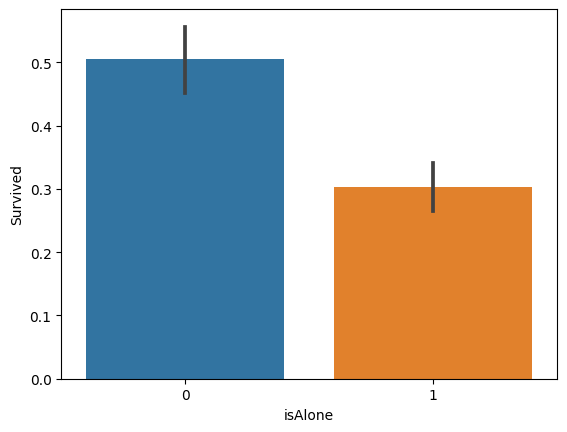

In [320]:
sns.barplot(x=df1['isAlone'],y=df1['Survived'])

#Age*Class

In [321]:
df1['Ageband'] = pd.cut(df['Age'],5)
df1[['Ageband','Survived']].groupby('Ageband',as_index=False).mean().sort_values('Ageband')

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [322]:
df1.loc[(df1['Age']<=16.336),'Age'] = 0
df1.loc[(df1['Age']>16.336) & (df1['Age']<=32.252),'Age'] = 1
df1.loc[(df1['Age']>32.252) & (df1['Age']<=48.168),'Age'] = 2
df1.loc[(df1['Age']>48.168) & (df1['Age']<=64.084),'Age'] = 3
df1.loc[(df1['Age']>64.084),'Age'] = 4

In [323]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Ageband
0,0,3,0,1.0,1.981001,S,Mr,0,"(16.336, 32.252]"
1,1,1,1,2.0,4.266662,C,Mrs,0,"(32.252, 48.168]"
2,1,3,1,1.0,2.070022,S,Miss,1,"(16.336, 32.252]"
3,1,1,1,2.0,3.972177,S,Mrs,0,"(32.252, 48.168]"
4,0,3,0,2.0,2.085672,S,Mr,1,"(32.252, 48.168]"


In [324]:
df1['Age'] = df1['Age'].apply(lambda x:int(x))
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Ageband
0,0,3,0,1,1.981001,S,Mr,0,"(16.336, 32.252]"
1,1,1,1,2,4.266662,C,Mrs,0,"(32.252, 48.168]"
2,1,3,1,1,2.070022,S,Miss,1,"(16.336, 32.252]"
3,1,1,1,2,3.972177,S,Mrs,0,"(32.252, 48.168]"
4,0,3,0,2,2.085672,S,Mr,1,"(32.252, 48.168]"


In [325]:
df1.drop(['Ageband'],axis=1,inplace=True,errors='ignore')
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,1.981001,S,Mr,0
1,1,1,1,2,4.266662,C,Mrs,0
2,1,3,1,1,2.070022,S,Miss,1
3,1,1,1,2,3.972177,S,Mrs,0
4,0,3,0,2,2.085672,S,Mr,1


In [326]:
df1['Age*Class'] = df1['Age']*df['Pclass']
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,1.981001,S,Mr,0,3
1,1,1,1,2,4.266662,C,Mrs,0,2
2,1,3,1,1,2.070022,S,Miss,1,3
3,1,1,1,2,3.972177,S,Mrs,0,2
4,0,3,0,2,2.085672,S,Mr,1,6


#Feature Encoding

In [327]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,0,3,0,1,1.981001,S,Mr,0,3
1,1,1,1,2,4.266662,C,Mrs,0,2
2,1,3,1,1,2.070022,S,Miss,1,3
3,1,1,1,2,3.972177,S,Mrs,0,2
4,0,3,0,2,2.085672,S,Mr,1,6


In [328]:
df2 = pd.get_dummies(data=df1, columns=['Embarked','Title'],drop_first=True)
df2.head()

,Survived,Pclass,Sex,Age,Fare,isAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,1.981001,0,3,0,1,0,1,0,0
1,1,1,1,2,4.266662,0,2,0,0,0,0,1,0
2,1,3,1,1,2.070022,1,3,0,1,1,0,0,0
3,1,1,1,2,3.972177,0,2,0,1,0,0,1,0
4,0,3,0,2,2.085672,1,6,0,1,0,1,0,0


In [329]:
df3 = df2

In [330]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df3['Fare'] = ss.fit_transform(np.array(df2['Fare']).reshape(-1,1))

In [331]:
df3.head()

,Survived,Pclass,Sex,Age,Fare,isAlone,Age*Class,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,1,-0.910717,0,3,0,1,0,1,0,0
1,1,1,1,2,1.369616,0,2,0,0,0,0,1,0
2,1,3,1,1,-0.821904,1,3,0,1,1,0,0,0
3,1,1,1,2,1.075818,0,2,0,1,0,0,1,0
4,0,3,0,2,-0.806291,1,6,0,1,0,1,0,0


#Modelling

Let's train the data with following models

*  Logistic Regression
*  SVC (linear)
*  SVC (rbf)
*  Naive Bayes
*  KNN
*  Decision Tree Classifier
*  Random Forest Classifier
*  XGBoost

In [332]:
X = df3.drop(['Survived'],axis=1)
y = df3['Survived']

In [333]:
#Splitting the data train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression

In [334]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr_test_acc = lr.score(X_test,y_test)
lr_train_acc = lr.score(X_train,y_train)
print('Train Accuracy = ',lr_train_acc,'Test Accuracy = ',lr_test_acc)

Train Accuracy =  0.8117977528089888 Test Accuracy =  0.7821229050279329


#SVC (linear)

In [335]:
svm_lin = SVC(kernel='linear')
svm_lin.fit(X_train, y_train)
y_pred_svm_lin = svm_lin.predict(X_test)
svm_lin_train_acc = svm_lin.score(X_train, y_train)
svm_lin_test_acc = svm_lin.score(X_test,y_test)
print('Train Accuracy = ',svm_lin_train_acc,'Test Accuracy = ',svm_lin_test_acc)

Train Accuracy =  0.7921348314606742 Test Accuracy =  0.7988826815642458


#SVC (rbf)

In [336]:
svm_rbf = SVC()
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
svm_rbf_train_acc = svm_rbf.score(X_train, y_train)
svm_rbf_test_acc = svm_rbf.score(X_test,y_test)
print('Train Accuracy = ',svm_rbf_train_acc,'Test Accuracy = ',svm_rbf_test_acc)

Train Accuracy =  0.8230337078651685 Test Accuracy =  0.8100558659217877


#KNN

In [337]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test,y_test)
print('Train Accuracy = ',knn_train_acc,'Test Accuracy = ',knn_test_acc)

Train Accuracy =  0.8581460674157303 Test Accuracy =  0.8324022346368715


#Naive Bayes

In [338]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_train_acc = nb.score(X_train, y_train)
nb_test_acc = nb.score(X_test,y_test)
print('Train Accuracy = ',nb_train_acc,'Test Accuracy = ',nb_test_acc)

Train Accuracy =  0.7907303370786517 Test Accuracy =  0.7877094972067039


#Decision Tree Classifier

In [339]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_train_acc = dtc.score(X_train, y_train)
dtc_test_acc = dtc.score(X_test,y_test)
print('Train Accuracy = ',dtc_train_acc,'Test Accuracy = ',dtc_test_acc)

Train Accuracy =  0.9424157303370787 Test Accuracy =  0.8156424581005587


In case of decision tree classifier overfitting occured

#Random Forest Classifier

In [340]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_train_acc = rfc.score(X_train, y_train)
rfc_test_acc = rfc.score(X_test,y_test)
print('Train Accuracy = ',rfc_train_acc,'Test Accuracy = ',rfc_test_acc)

Train Accuracy =  0.9424157303370787 Test Accuracy =  0.8547486033519553


#XGBoost

In [341]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
xg_train_acc = xg.score(X_train, y_train)
xg_test_acc = xg.score(X_test,y_test)
print('Train Accuracy = ',xg_train_acc,'Test Accuracy = ',xg_test_acc)

Train Accuracy =  0.9297752808988764 Test Accuracy =  0.8268156424581006


#Training and Test Accuracy

In [342]:
df4 = pd.DataFrame({'Model' : ['Logistic Regression','SVM linear','SVM RBF','KNN','Naive Bayes','Decision Treee Classifier','Random Forest Classifier','XGBoost'],
                               'Train Accuracy' : [lr_train_acc,svm_lin_train_acc,svm_rbf_train_acc,knn_train_acc,nb_train_acc,dtc_train_acc,rfc_train_acc,xg_train_acc],
                                'Test Accuracy' : [lr_test_acc,svm_lin_test_acc,svm_rbf_test_acc,knn_test_acc,nb_test_acc,dtc_test_acc,rfc_test_acc,xg_test_acc]}
                               )
df4.sort_values('Train Accuracy',ascending=False)

,Model,Train Accuracy,Test Accuracy
5,Decision Treee Classifier,0.942416,0.815642
6,Random Forest Classifier,0.942416,0.854749
7,XGBoost,0.929775,0.826816
3,KNN,0.858146,0.832402
2,SVM RBF,0.823034,0.810056
0,Logistic Regression,0.811798,0.782123
1,SVM linear,0.792135,0.798883
4,Naive Bayes,0.790730,0.787709


#K-fold cross validation

In [343]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC(kernel='linear'))
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(xgb.XGBClassifier())

In [344]:
cv_scores = []

for classifier in classifiers:
  cv_scores.append(cross_val_score(classifier,X,y,cv=10,scoring='accuracy'))

In [345]:
cv_mean = []
cv_std = []

for cv_score in cv_scores:
  cv_mean.append(cv_score.mean())
  cv_std.append(cv_score.std())

In [346]:
df4['cv_mean'] = pd.DataFrame(cv_mean)
df4['cv_std'] = pd.DataFrame(cv_std)
df4.sort_values('cv_mean',ascending=False)

,Model,Train Accuracy,Test Accuracy,cv_mean,cv_std
7,XGBoost,0.929775,0.826816,0.831698,0.043277
2,SVM RBF,0.823034,0.810056,0.814806,0.037721
3,KNN,0.858146,0.832402,0.813770,0.047827
6,Random Forest Classifier,0.942416,0.854749,0.809238,0.026757
5,Decision Treee Classifier,0.942416,0.815642,0.801398,0.038277
0,Logistic Regression,0.811798,0.782123,0.799114,0.034536
1,SVM linear,0.792135,0.798883,0.790137,0.036159
4,Naive Bayes,0.790730,0.787709,0.781124,0.029968


<Axes: xlabel='cv_mean', ylabel='Model'>

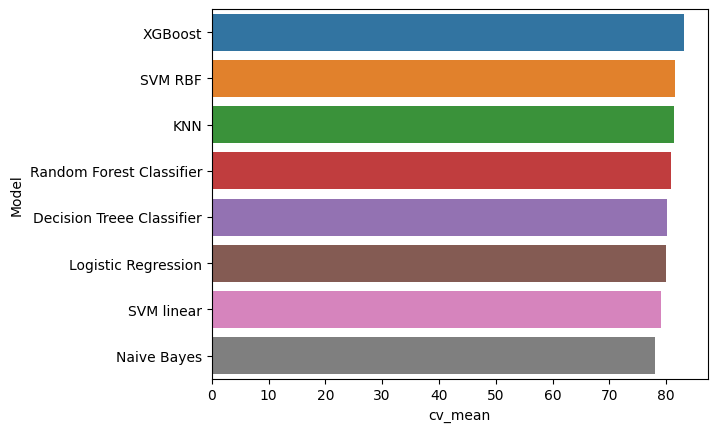

In [347]:
sns.barplot(x=df4['cv_mean']*100,y=df4['Model'],order=df4.sort_values('cv_mean',ascending=False)['Model'])

So we are getting high cross validation score with XGBoost model. But let's perform hyperparameter tuning for SVM

#Hyperparameter Tuning for SVM

In [348]:
classifier = SVC()
param_grid = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid = GridSearchCV(classifier,param_grid,cv=5, scoring='accuracy',n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [349]:
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 0.25, 'gamma': 0.2, 'kernel': 'rbf'}
Best estimator:  SVC(C=0.25, gamma=0.2)


In [350]:
svc = SVC(C=0.25, gamma=0.2, kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
svc_train_acc = svc.score(X_train,y_train)
svc_test_acc = svc.score(X_test,y_test)
print('Train accuracy = ',svc_train_acc,'Test accuracy = ',svc_test_acc)

Train accuracy =  0.8202247191011236 Test accuracy =  0.8156424581005587


In [351]:
cross_val_score(svc,X,y,cv=10,scoring='accuracy').mean()

0.8159176029962547

<Axes: xlabel='cv_mean', ylabel='Model'>

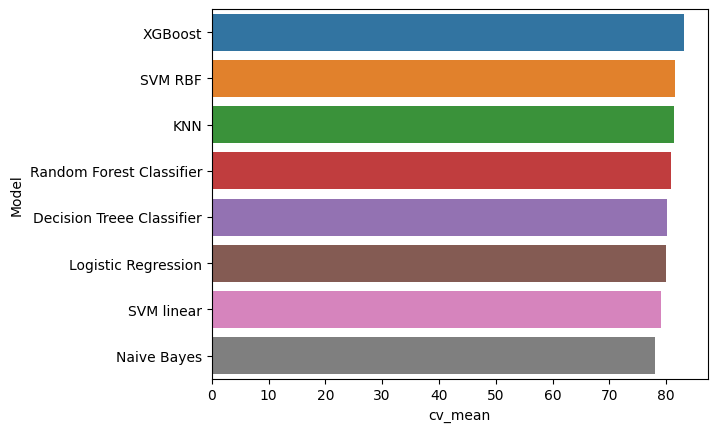

In [352]:
sns.barplot(x=df4['cv_mean']*100,y=df4['Model'],order=df4.sort_values('cv_mean',ascending=False)['Model'])

So we are getting high accuracy for XGBoost algorithm which is 83.17%